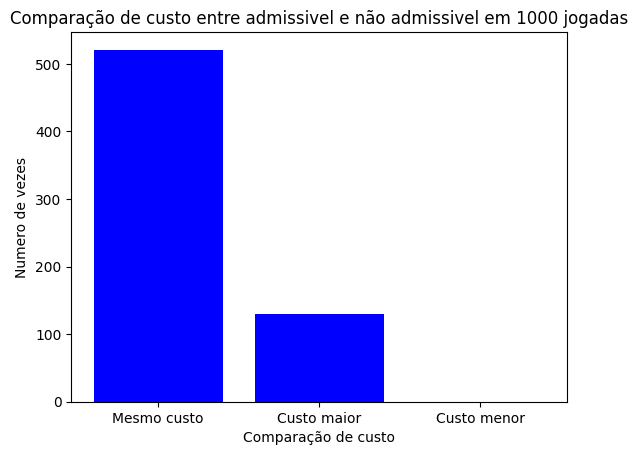

In [28]:
import random
import matplotlib.pyplot as plt
import numpy as np
from main import a_star

def generate_random_maze(size, num_obstacles):
    maze = [[0 for _ in range(size)] for _ in range(size)]
    for _ in range(num_obstacles):
        obstacle_pos = (random.randint(0, size-1), random.randint(0, size-1))
        maze[obstacle_pos[0]][obstacle_pos[1]] = 1
    return maze

def generate_random_positions(size):
    start_position = (random.randint(0, size-1), random.randint(0, size-1))
    end_position = (random.randint(0, size-1), random.randint(0, size-1))
    while end_position == start_position:
        end_position = (random.randint(0, size-1), random.randint(0, size-1))
    return start_position, end_position

def analise_histograma(numero_vezes, nmr_obstaculos):
    size = 5
    same_cost_count = 0
    higher_cost_count = 0
    lower_cost_count = 0

    for _ in range(numero_vezes):
        maze = generate_random_maze(size, nmr_obstaculos)
        start_position, end_position = generate_random_positions(size)
        path_admissible, _, closed_list_admissible = a_star(maze, start_position, end_position, admissible_heuristic=True)
        cost_admissible = closed_list_admissible[-1].g

        path_non_admissible, _, closed_list_non_admissible = a_star(maze, start_position, end_position, admissible_heuristic=False)
        cost_non_admissible = closed_list_non_admissible[-1].g

        if path_admissible is None or path_non_admissible is None:
            continue
        elif cost_admissible == cost_non_admissible:
            same_cost_count += 1
        elif cost_non_admissible > cost_admissible:
            higher_cost_count += 1
        else:
            lower_cost_count += 1

    # Create histogram
    labels = ['Mesmo custo', 'Custo maior', 'Custo menor']
    counts = [same_cost_count, higher_cost_count, lower_cost_count]

    plt.bar(labels, counts, color='blue')
    plt.xlabel('Comparação de custo')
    plt.ylabel('Numero de vezes')
    plt.title(f'Comparação de custo entre admissivel e não admissivel em {numero_vezes} jogadas')
    plt.show()

analise_histograma(1000, 10)
